In [1]:
import pandas as pd
df = pd.read_csv("dump.csv")
df.head()

,Algorithm,Runtime
0,CubeSort,3.989099
1,CubeSort,5.498144
2,CubeSort,5.464906
3,CubeSort,5.503226
4,CubeSort,5.529292


In [14]:
import pandas as pd

algos = ["CubeSort","Quicksort","MergeSort","HeapSort"]
arr = []
arr.append(pd.read_csv('../data files/results/CubeSort.csv'))
arr.append(pd.read_csv('../data files/results/QuickSort.csv'))
arr.append(pd.read_csv('../data files/results/MergeSort.csv'))
arr.append(pd.read_csv('../data files/results/HeapSort.csv'))
for d in range(len(arr)):
  print(f"{algos[d]} mean: {arr[d]['Runtime'].mean()}")
df = pd.concat(arr,ignore_index=True)

df.head()

CubeSort mean: 1.5536828231811524
Quicksort mean: 7.9128934454917905
MergeSort mean: 10.358383336067199
HeapSort mean: 29.70140372753143


,Algorithm,Runtime
0,CubeSort,0.991983
1,CubeSort,1.304770
2,CubeSort,1.322150
3,CubeSort,1.394173
4,CubeSort,1.523029


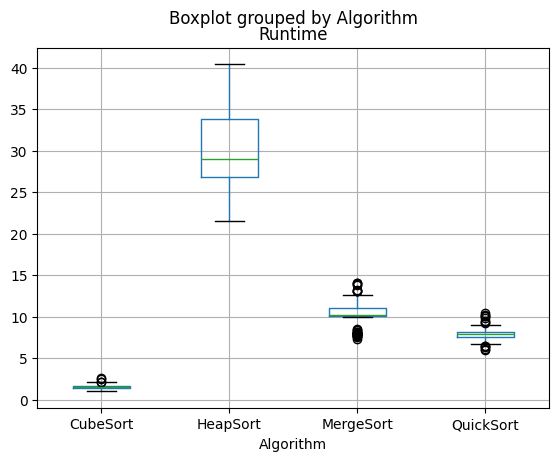

In [15]:
import matplotlib.pyplot as plt
df.boxplot(column="Runtime", by="Algorithm")
plt.show()

Hipótesis H_0: El promedio del tiempo de ejecución para los 4 algoritmos es el mismo

In [16]:
# Verificación de supuestos de distribución normal y homogeneidad de varianzas
import scipy.stats
SIGNIFICANCE = 0.05
normal_distributions = True
homogeneous_variances = True

ss = []
for algo in ["CubeSort","QuickSort","MergeSort","HeapSort"]:
  subset = df.loc[df['Algorithm'] == algo, 'Runtime']
  ss.append(subset)
  stat, p_value = scipy.stats.shapiro(subset)
  print(f"Shapiro-Wilk for {algo} group: stat={stat}, p-value={p_value}")
  if p_value < SIGNIFICANCE:
    normal_distributions = False

stat, p_value = scipy.stats.levene(ss[0],ss[1],ss[2],ss[3])
print(f"Levene test for all four groups: stat={stat}, p-value={p_value}")
if p_value < SIGNIFICANCE:
  homogeneous_variances = False

Shapiro-Wilk for CubeSort group: stat=0.911092116681753, p-value=4.886226711046558e-06
Shapiro-Wilk for QuickSort group: stat=0.9361158368957118, p-value=0.00011260811177244658
Shapiro-Wilk for MergeSort group: stat=0.9345128579224913, p-value=9.059752753443118e-05
Shapiro-Wilk for HeapSort group: stat=0.93556313697448, p-value=0.0001044428180133801
Levene test for all four groups: stat=162.5453205554606, p-value=1.1348032148329244e-68


In [17]:
# Anova o alternativas
null_hypothesis = True
if normal_distributions and homogeneous_variances:
  f_stat, p_value = scipy.stats.f_oneway(ss[0],ss[1],ss[2],ss[3])
  print(f"ANOVA for algorithm runtimes: f-stat={f_stat}, p-value={p_value}")
else: # todo: Implement Welch's ANOVA
  h_stat, p_value = scipy.stats.kruskal(ss[0],ss[1],ss[2],ss[3])
  print(f"Kruskal-Wallis test for algorithm runtimes: H-stat={h_stat}, p-value={p_value}")

  
if p_value < SIGNIFICANCE:
  null_hypothesis = False

Kruskal-Wallis test for algorithm runtimes: H-stat=360.7543675810475, p-value=6.997278566683145e-78


In [18]:
# Post hoc tests
if not null_hypothesis:
  if normal_distributions:
    scipy.stats.tukey_hsd(ss[0],ss[1],ss[2],ss[3])
  else:
    import scikit_posthocs
    p_values = scikit_posthocs.posthoc_dunn(df, val_col="Runtime", group_col="Algorithm", p_adjust="bonferroni")
    print(p_values)

               CubeSort      HeapSort     MergeSort     QuickSort
CubeSort   1.000000e+00  2.045424e-74  1.771221e-30  1.092283e-10
HeapSort   2.045424e-74  1.000000e+00  1.092283e-10  1.771221e-30
MergeSort  1.771221e-30  1.092283e-10  1.000000e+00  5.498990e-06
QuickSort  1.092283e-10  1.771221e-30  5.498990e-06  1.000000e+00


Para cada par que tenga un valor p menor que el nivel de significancia trabajado de 5%, se rechaza la hipótesis nula de la prueba de Dunn que señala que el tiempo de ejecución medio entre ambos algoritmos es igual.

A partir de la prueba de Dunn como prueba post hoc a Kruskal-Walliz con corrección de Bonferroni para controlar los falsos positivos, todos los algoritmos tienen medias diferentes por factores no atribuibles al azar.

In [ ]:
# df.to_csv("dump.csv",index=False)

In [ ]:
asodjasd